In [1]:
# Lousin Babayan
# CA06

In [2]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

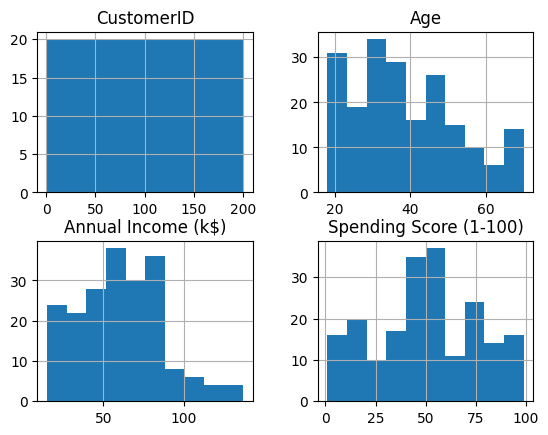

In [7]:
# Vizualize Dataset with Histograms
df.hist()
plt.show()

<AxesSubplot: >

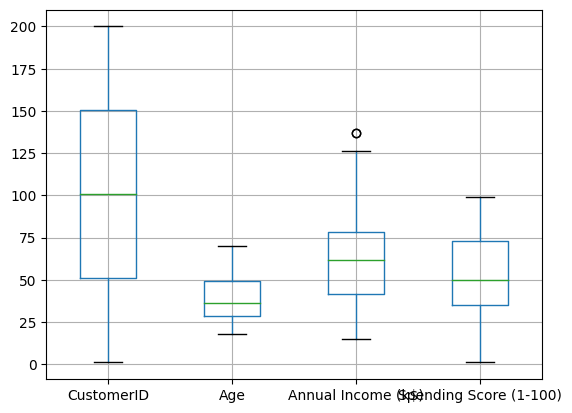

In [8]:
# Visualize the Dataset with boxplots
df.boxplot()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
df_new = scaler.fit_transform((df[["Annual Income (k$)", "Spending Score (1-100)"]]))

In [12]:
df_new = pd.DataFrame(df_new, columns = ["Annual Income (k$)", "Spending Score (1-100)"])

In [13]:
# check new dataset
df_new.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [14]:
df_cluster = pd.DataFrame(columns = ['Annual Income (k$)', "Spending Score (1-100)"])

In [15]:
# kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
silhouette_scores = []

In [17]:
for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_new)
    silhouette_scores.append(silhouette_score(df_new,kmeans.labels_))

C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

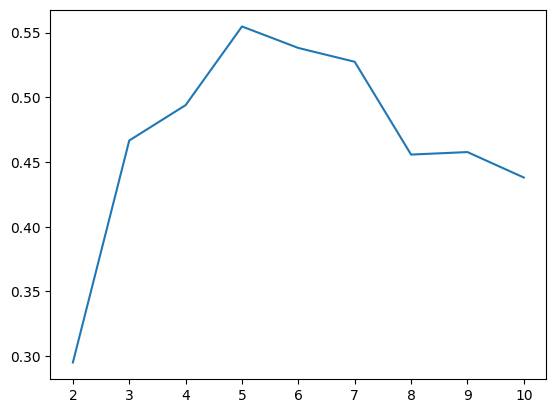

In [18]:
# plot 
plt.plot(range(2,11),silhouette_scores)

In [19]:
# The optimal number of cluster is at 5, because we see that the silhoutte score has the highest peak at 5. 

In [35]:
# Create the clusters
kmeans = KMeans(5)
kmeans.fit(df_new)
cluster = kmeans.predict(df_new)


C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lsnba\anaconda3\envs\BSAN 6070\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
df_new['Clusters']=cluster
df_new.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,3


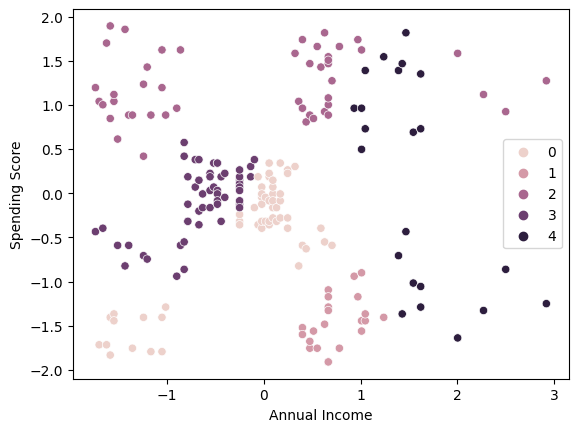

In [37]:
# Plot clusters
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df_new, hue=cluster)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [38]:
# Cluster Analysis 
# We have a total of 5 clusters.

In [45]:
# Cluster 0
# Has an annual income of -1 to 0 and a spending score of -0.5 to 0.5.
# I would describe this cluser as a group in the middle.
# The annual income and the spending score seem to be roughly in the middle 
# of all 5 clusters. 

In [46]:
# Cluster 1
# Has an annual income of 0.25 (about) to 3, with a spending score between 0.5 to 2.0.
# This cluster is the highest annual income with the higher spending score.

In [47]:
# Cluster 2
# Has an annual income of 0.25 (about) to 3, with a spending score between -2.0 to -0.4 (about).
# This cluster is the highest annual income with the lower spending score.

In [48]:
# Cluster 3
# Has an annual income of -2.0 to -0.8 (about) , with a spending score between -2.0 to -0.45 (about).
# This cluster is the lowest annual income with the lowest spending score.

In [49]:
# Cluster 4
# This cluster has an annual income of -2.0 to -0.8 (about) and a spending score of 0.4 (about) to 2.0.
# this cluster has a low annual income with a high spending score. 